In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

dmerge=pd.read_excel('merge_without_YLS_3152.xlsx')

In [2]:
def group(data,column):
    gp = data.groupby(column)    
    result=[gp.get_group(x) for x in gp.groups]
    return result
new=group(dmerge,'YES Transition')
print(len(new[0]),len(new[1]))
print(new[0]['YES Transition'])

non_par=new[0]
par=new[1]


1824 1329
0       No
1       No
2       No
3       No
4       No
        ..
3145    No
3146    No
3147    No
3150    No
3151    No
Name: YES Transition, Length: 1824, dtype: object


***Non-par: Group Race (2018 Std.), MSO Offense Type, Age 1st Arrest***

In [3]:
print(type(non_par))
def analysis(data,var):
    d=data.groupby(var)['Treatment LOS']
    dm=d.median().to_frame()
    dc=d.count().to_frame()
    dt=pd.merge(dm,dc,on=var)
    dfinal=dt.rename(columns={'Treatment LOS_x': 'Days', 'Treatment LOS_y': 'Population'})
    return dfinal

race=analysis(non_par,'Race (2018 Std.)')
off=analysis(non_par, 'MSO Offense Type')
age=analysis(non_par,'Age 1st Arrest')
print(race)
print(off)
print(age)

<class 'pandas.core.frame.DataFrame'>
                                            Days  Population
Race (2018 Std.)                                            
Asian                                      244.0          27
Black or African American                  224.0         472
Chooses not to self-identify               127.0           5
Hispanic                                   196.5         454
Multiracial                                238.0           7
Native Hawaiian or Other Pacific Islander  398.0           1
Other                                      230.5         200
Unknown                                     96.0           1
White                                      168.0         657
                             Days  Population
MSO Offense Type                             
**no information anywhere**  1178           3
Drugs                         151          77
Motor Vehicle                 182          53
Person                        219         877
Property       

***plot non_par graph***

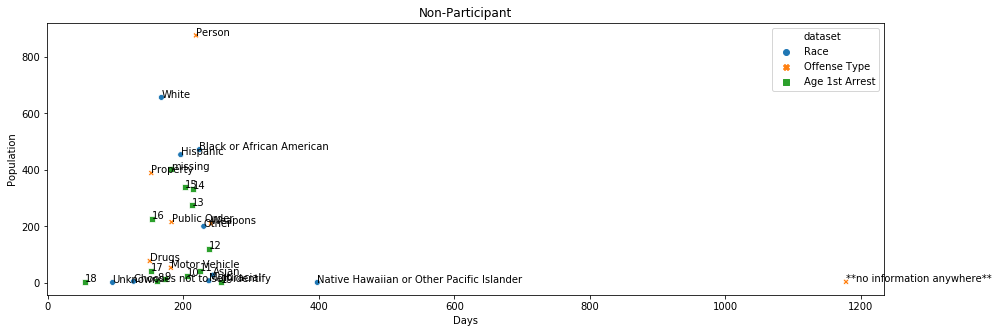

In [4]:
new=pd.concat([race.assign(dataset='Race'), off.assign(dataset='Offense Type'),age.assign(dataset='Age 1st Arrest')])
plt.figure(figsize=(15,5))
plot=sns.scatterplot(x='Days', y='Population', data=new,hue='dataset',style='dataset')
plt.title('Non-Participant')

def label(var):
    n=list(var.index)
    for i in range(len(n)):
        plt.text(var.iloc[i]['Days'],var.iloc[i]['Population'],n[i])

label(race)
label(off)
label(age)

In [5]:
racep=analysis(par,'Race (2018 Std.)')
offp=analysis(par, 'MSO Offense Type')
agep=analysis(par,'Age 1st Arrest')
print(racep)
print(offp)
print(agep)

                                            Days  Population
Race (2018 Std.)                                            
American Indian or Alaska Native           389.0           3
Asian                                      170.0          16
Black or African American                  211.0         397
Chooses not to self-identify               152.5           8
Hispanic                                   183.0         476
Multiracial                                164.0          17
Native Hawaiian or Other Pacific Islander  295.5           2
Other                                      179.0          65
White                                      178.0         345
                   Days  Population
MSO Offense Type                   
Drugs             139.5          46
Motor Vehicle     153.0          41
Person            204.0         651
Property          167.5         310
Public Order      166.0         140
Weapons           243.0         141
                 Days  Population
Age 1st

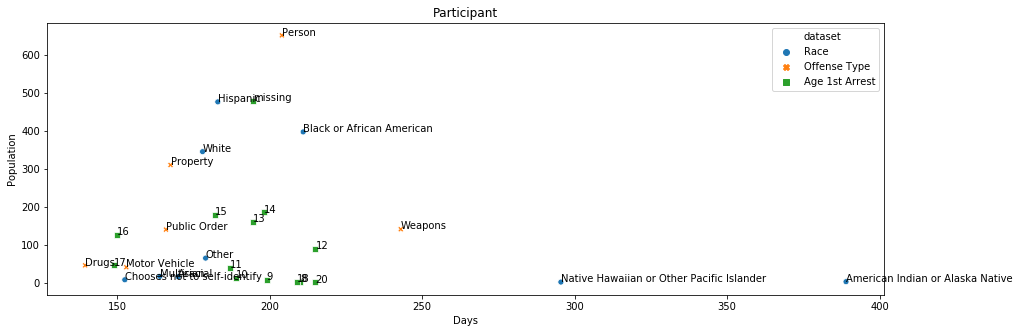

In [6]:
par_plot=pd.concat([racep.assign(dataset='Race'), offp.assign(dataset='Offense Type'),agep.assign(dataset='Age 1st Arrest')])
plt.figure(figsize=(15,5))
plotp=sns.scatterplot(x='Days', y='Population', data=par_plot,hue='dataset',style='dataset')
plt.title('Participant')

label(racep)
label(offp)
label(agep)